In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})
from photochem import Atmosphere, zahnle_earth, __version__
from ruamel.yaml import YAML
yaml = YAML(typ='safe')
import subprocess

print("photochem version ==",__version__)

photochem version == 0.2.6


In [2]:
subprocess.run("rm -rf ./planetary_atmosphere_observations".split())
subprocess.run("git clone --depth=1 https://github.com/Nicholaswogan/planetary_atmosphere_observations.git".split())
subprocess.run("rm -rf ./planetary_atmosphere_observations/.git".split())

CompletedProcess(args=['rm', '-rf', './planetary_atmosphere_observations/.git'], returncode=0)

In [3]:
from planetary_atmosphere_observations.utils import retrieve_species

def get_citations(species, data, markers=['o','s','d','^','>']):
    citations = []
    for i,sp in enumerate(species):
        entry = retrieve_species(sp, data)
        for a in entry:    
            citations.append(a['citation']) 
    citations = list(set(citations))
    cit = {citations[i]: markers[i] for i in range(len(citations))}
    return cit

# Earth

In [4]:
fil = open("planetary_atmosphere_observations/Earth.yaml",'r')
earth = yaml.load(fil)
fil.close()

In [5]:
pc = Atmosphere(zahnle_earth,\
                "../templates/ModernEarth/settings_ModernEarth.yaml",\
                "../templates/ModernEarth/Sun_now.txt",\
                "../templates/ModernEarth/atmosphere_ModernEarth.txt")

In [6]:
pc.var.atol = 1e-27
pc.initialize_stepper(pc.wrk.usol)
tn = 0
while tn<1e17:
    tn = pc.step()
pc.destroy_stepper()

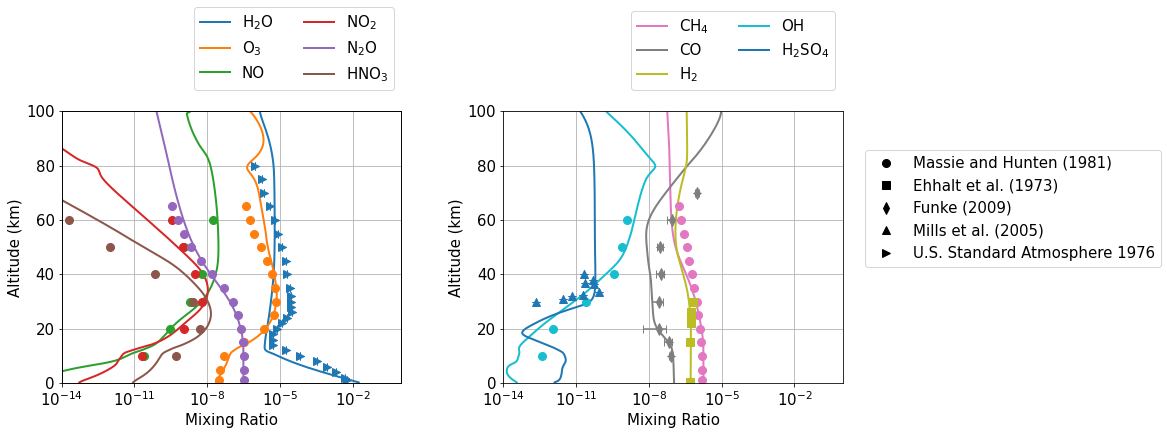

In [8]:
plt.rcParams.update({'font.size': 15})
fig,[ax,ax1] = plt.subplots(1,2,figsize=[14,5])
fig.patch.set_facecolor("w")

sol = pc.mole_fraction_dict()

species1 = ['H2O','O3','NO','NO2','N2O','HNO3']
labels1 = ['H$_2$O','O$_3$','NO','NO$_2$','N$_2$O','HNO$_3$']
species2 = ['CH4','CO','H2','OH','H2SO4']
labels2 = ['CH$_4$','CO','H$_2$','OH','H$_2$SO$_4$']

cit = get_citations(species1+species2,earth)
citations = [key for key in cit.keys()]

ax2 = ax.twinx()
for c in citations:
    ax2.errorbar([],[],\
                    c='k',marker=cit[c],ls='',capsize=4,ms=8,label=c)
ax2.set_yticks([])
ax2.legend(ncol=1,bbox_to_anchor=(2.8,.4),loc='lower center')

# now we can plot
for i,sp in enumerate(species1):
    ax.plot(sol[sp],sol['alt'],label=labels1[i],lw=2)
    entry = retrieve_species(sp,earth)
    for j,en in enumerate(entry):
        ax.errorbar(en['mix'],en['alt'],xerr = en['mix-err'],yerr = en['mix-err'],\
                    c='C'+str(i),marker=cit[en['citation']],ls='',capsize=4,ms=8)
        
ax.grid()
ax.set_ylim(0,100)
ax.set_xlim(1e-14,1)
ax.set_xscale('log')
ax.legend(ncol=2,bbox_to_anchor=(1,1.05),loc='lower right')
ax.set_xlabel('Mixing Ratio')
ax.set_ylabel('Altitude (km)')

kk = len(species1)
for i,sp in enumerate(species2):
    ax1.plot(sol[sp],sol['alt'],'C'+str(i+kk),label=labels2[i],lw=2)
    entry = retrieve_species(sp,earth)
    for j,en in enumerate(entry):
        ax1.errorbar(en['mix'],en['alt'],xerr = en['mix-err'],yerr = en['mix-err'],\
                    c='C'+str(i+kk),marker=cit[en['citation']],ls='',capsize=4,ms=8)

ax1.grid()
ax1.set_ylim(0,100)
ax1.set_xlim(1e-14,1)
ax1.set_xscale('log')
ax1.legend(ncol=2,bbox_to_anchor=(1,1.05),loc='lower right')
ax1.set_xlabel('Mixing Ratio')
ax1.set_ylabel('Altitude (km)')

plt.subplots_adjust(wspace=.3)

plt.show()

# Mars

In [9]:
fil = open("planetary_atmosphere_observations/Mars.yaml",'r')
mars = yaml.load(fil)
fil.close()

In [10]:
pc = Atmosphere(zahnle_earth,\
                "../templates/Mars/settings_Mars.yaml",\
                "../templates/ModernEarth/Sun_now.txt",\
                "../templates/Mars/atmosphere_Mars.txt")

In [11]:
pc.var.atol = 1e-27
pc.initialize_stepper(pc.wrk.usol)
tn = 0
while tn<1e17:
    tn = pc.step()
pc.destroy_stepper()

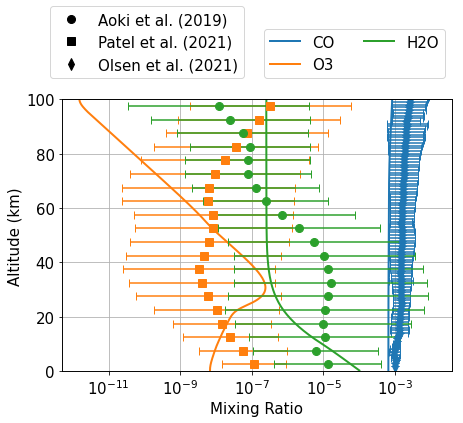

In [12]:
fig,ax = plt.subplots(1,1,figsize=[7,5])
fig.patch.set_facecolor("w")

sol = pc.mole_fraction_dict()

species = ['CO','O3','H2O']
labels = ['CO','O$_3$','H$_2$O']

cit = get_citations(species,mars)
citations = [key for key in cit.keys()]
ax2 = ax.twinx()
for c in citations:
    ax2.errorbar([],[],\
                    c='k',marker=cit[c],ls='',capsize=4,ms=8,label=c)
ax2.set_yticks([])
ax2.legend(ncol=1,bbox_to_anchor=(-.05,1.05),loc='lower left')

for i,sp in enumerate(species):
    ax.plot(sol[sp],sol['alt'],'C'+str(i)+'-',label=sp,lw=2)
    entry = retrieve_species(sp,mars)
    for en in entry:
        ax.errorbar(en['mix'],en['alt'],xerr = en['mix-err'],yerr = en['mix-err'],\
                   marker=cit[en['citation']],ls='',capsize=4,ms=8)

ax.grid()
ax.set_ylim(0,100)
ax.set_xscale('log')
ax.legend(ncol=2,bbox_to_anchor=(1,1.05),loc='lower right')
ax.set_xlabel('Mixing Ratio')
ax.set_ylabel('Altitude (km)')

    
plt.show()

# Titan

In [13]:
fil = open("planetary_atmosphere_observations/titan.yaml",'r')
titan = yaml.load(fil)
fil.close()

In [14]:
pc = Atmosphere(zahnle_earth,\
                "../templates/Titan/settings_Titan.yaml",\
                "../templates/ModernEarth/Sun_now.txt",\
                "../templates/Titan/atmosphere_Titan.txt")

In [15]:
pc.initialize_stepper(pc.wrk.usol)
tn = 0
while tn<1e17:
    tn = pc.step()
pc.destroy_stepper()

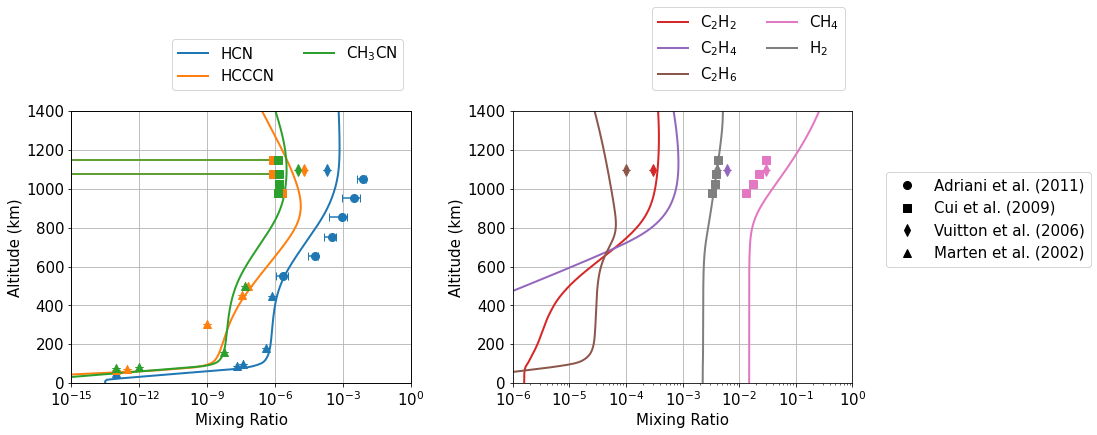

In [16]:
plt.rcParams.update({'font.size': 15})
fig,[ax,ax1] = plt.subplots(1,2,figsize=[14,5])
fig.patch.set_facecolor("w")

sol = pc.mole_fraction_dict()

species1 = ['HCN','HCCCN','CH3CN']
labels1 = ['HCN','HCCCN','CH$_3$CN']
species2 = ['C2H2','C2H4','C2H6','CH4','H2']
labels2 = ['C$_2$H$_2$','C$_2$H$_4$','C$_2$H$_6$','CH$_4$','H$_2$']

cit = get_citations(species1+species2,titan)
citations = [key for key in cit.keys()]
ax2 = ax.twinx()
for c in citations:
    ax2.errorbar([],[],\
                    c='k',marker=cit[c],ls='',capsize=4,ms=8,label=c)
ax2.set_yticks([])
ax2.legend(ncol=1,bbox_to_anchor=(2.7,.4),loc='lower center')

for i,sp in enumerate(species1):
    ax.plot(sol[sp],sol['alt'],'C'+str(i),label=labels1[i],lw=2)
    entry = retrieve_species(sp,titan)
    for j,en in enumerate(entry):
        ax.errorbar(en['mix'],en['alt'],xerr = en['mix-err'],yerr = en['mix-err'],\
                    c='C'+str(i),marker=cit[en['citation']],ls='',capsize=4,ms=8)
    
ax.grid()
ax.set_ylim(0,1400)
ax.set_xlim(1e-15,1)
ax.set_xscale('log')
ax.legend(ncol=2,bbox_to_anchor=(1,1.05),loc='lower right')
ax.set_xlabel('Mixing Ratio')
ax.set_ylabel('Altitude (km)')

kk = len(species1)
for i,sp in enumerate(species2):
    ax1.plot(sol[sp],sol['alt'],'C'+str(i+kk),label=labels2[i],lw=2)
    entry = retrieve_species(sp,titan)
    for j,en in enumerate(entry):
        ax1.errorbar(en['mix'],en['alt'],xerr = en['mix-err'],yerr = en['mix-err'],\
                    c='C'+str(i+kk),marker=cit[en['citation']],ls='',capsize=4,ms=8)

ax1.grid()
ax1.set_ylim(0,1400)
ax1.set_xlim(1e-6,1)
ax1.set_xscale('log')
ax1.legend(ncol=2,bbox_to_anchor=(1,1.05),loc='lower right')
ax1.set_xlabel('Mixing Ratio')
ax1.set_ylabel('Altitude (km)')

plt.subplots_adjust(wspace=.3)
    
plt.show()

# Saturn

In [17]:
fil = open("planetary_atmosphere_observations/saturn.yaml",'r')
saturn = yaml.load(fil)
fil.close()

In [18]:
pc = Atmosphere(zahnle_earth,\
                "../templates/Saturn/settings_Saturn.yaml",\
                "../templates/ModernEarth/Sun_now.txt",\
                "../templates/Saturn/atmosphere_Saturn.txt")

In [19]:
pc.initialize_stepper(pc.wrk.usol)
pc.var.atol=1e-32
tn = 0
while tn<1e17:
    tn = pc.step()
pc.destroy_stepper()

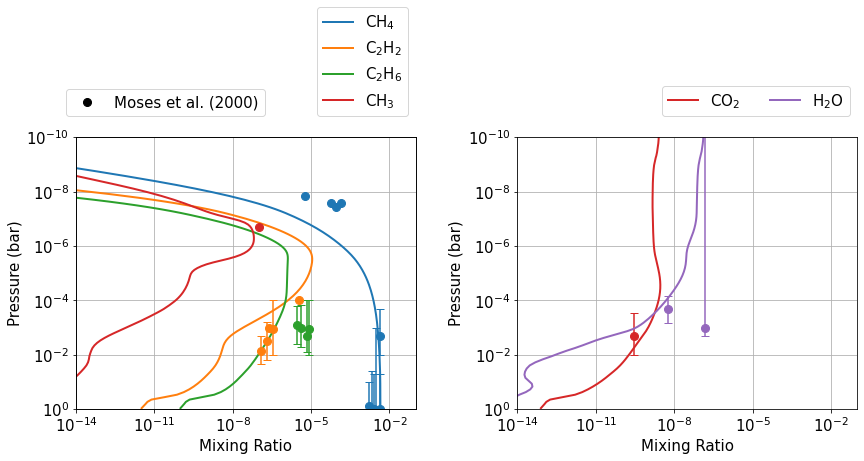

In [20]:
plt.rcParams.update({'font.size': 15})
fig,[ax,ax1] = plt.subplots(1,2,figsize=[14,5])
fig.patch.set_facecolor("w")

sol = pc.mole_fraction_dict()

species1 = ['CH4','C2H2','C2H6','CH3']
labels1 = ['CH$_4$','C$_2$H$_2$','C$_2$H$_6$','CH$_3$']
species2 = ['CO2','H2O']
labels2 = ['CO$_2$','H$_2$O']

cit = get_citations(species1+species2,saturn)
citations = [key for key in cit.keys()]
ax2 = ax.twinx()
for c in citations:
    ax2.errorbar([],[],c='k',marker=cit[c],ls='',capsize=4,ms=8,label=c)
ax2.set_yticks([])
ax2.legend(ncol=1,bbox_to_anchor=(-0.05,1.05),loc='lower left')

citations = []
for i,sp in enumerate(species1):
    ax.plot(sol[sp],pc.wrk.pressure/1e6,label=labels1[i],lw=2)
    en = retrieve_species(sp,saturn)[0]
    ax.errorbar(en['mix'],en['P'],xerr = en['mix-err'],yerr = en['P-err'],\
                    c='C'+str(i),marker='o',ls='',capsize=4,ms=8)
    
ax.grid()
ax.set_yscale('log')
ax.set_ylim(1,1e-10)
ax.set_xlim(1e-14,1e-1)
ax.set_xscale('log')
ax.legend(ncol=1,bbox_to_anchor=(1,1.05),loc='lower right')
ax.set_xlabel('Mixing Ratio')
ax.set_ylabel('Pressure (bar)')

for i,sp in enumerate(species2):
    ax1.plot(sol[sp],pc.wrk.pressure/1e6,'C'+str(i+3),label=labels2[i],lw=2)
    en = retrieve_species(sp,saturn)[0]
    ax1.errorbar(en['mix'],en['P'],xerr = en['mix-err'],yerr = en['P-err'],\
                    c='C'+str(i+3),marker='o',ls='',capsize=4,ms=8)
    
ax1.grid()
ax1.set_yscale('log')
ax1.set_ylim(1,1e-10)
ax1.set_xlim(1e-14,1e-1)
ax1.set_xscale('log')
ax1.legend(ncol=2,bbox_to_anchor=(1,1.05),loc='lower right')
ax1.set_xlabel('Mixing Ratio')
ax1.set_ylabel('Pressure (bar)')

plt.subplots_adjust(wspace=.3)
    
plt.show()